In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torchvision as tv

In [ ]:
matchs = [torch.argmax[i]==torch.argmax[j] for i,j in zip(output,y)]

## Prepare Fashion MNIST data

## Build a CNN

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,24,3,stride=1,padding=1,bias=False)
        self.bn1 = nn.BatchNorm2d(24)
        self.conv2 = nn.Conv2d(24,24,3,stride=1,padding=1,bias=False)
        self.bn2 = nn.BatchNorm2d(24)
        self.pool = nn.MaxPool2d((2,2))
        self.fc1 = nn.Linear(24*7*7,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)
    def forward(self,x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
def learn(net,train,val,epochs,lr):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(filter(lambda p:p.requires_grad ,net.parameters()),lr,momentum=0.9)
    for epoch in range(1,epochs+1):
        for d,batch in enumerate(train):
            optimizer.zero_grad()
            img,label = batch
            output = net(img)
            loss = loss_fn(output,label)
            loss.backward()
            optimizer.step()
        print('Epoch {} Loss {}'.format(epoch,loss.item()))
        

## Setup TensorBoard

In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
writer = SummaryWriter('runs/fashion_1')

Let's add an image grid to our writer using `make_grid`

In [ ]:
img,lable = next(iter(trainloader))
cLab = [classes[l] for l in lable]
imgs = tv.utils.make_grid(img,nrow=5, normalize=True)
plt.figure(figsize=(10,10))
plt.imshow(imgs.permute(1,2,0))
print(cLab)
writer.add_image('Fashion MNIST Batch',imgs)

Run the below command from terminal

In [22]:
#!tensorboard --logdir=runs

To plot your network:

In [ ]:
writer.add_graph(net,img)
writer.close()

In [1]:
# add the below lines in your trainer
        summary.add_scalar('Losses',loss_e,epoch)
        summary.add_scalar('Correct Predections',correct,epoch)
        summary.add_scalar('Accuaracy',accuracy,epoch)
        summary.add_histogram('fc weights',net.fc.weight,epoch)
        summary.add_histogram('fc biases',net.fc.bias,epoch)
        summary.add_histogram('fc weights gradients',net.fc.weight.grad,epoch)

IndentationError: unexpected indent (<ipython-input-1-8d72826cb188>, line 2)

### Spring out a random sample of 100 images with their labels

In [ ]:
s = np.random.randint(len(trainset))
n = 100
img,label = trainset.data[s:s+n],trainset.targets[s:s+n]
tags = [classes[l] for l in label]
writer.add_embedding(img.view(-1,28*28),metadata=tags,label_img=img.unsqueeze(1))

In [ ]:
np.random.randint(len(trainset))

In [ ]:
s = np.random.randint(len(trainset))
n = 100

trainset.data[s:s+n].unsqueeze(1).shape

In [ ]:
# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# select random images and their target indices
images, labels = select_n_random(trainset.data, trainset.targets)

# get the class labels for each image
class_labels = [classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()

In [ ]:
L = [i==j for i,j in zip(a,b)]
L.count(True)
# next(iter(zip(a,b)))

In [ ]:
from pathlib import Path
path = Path('./')
m = [a for a in path.iterdir() if Path.is_file(a)]

In [ ]:
m = Path('./')

In [ ]:
e = list(a for a in m.ls() if Path.is_dir(a))

In [ ]:
e

# list of images in dataset from ImageFolder

In [ ]:
from torch.utils.data import Dataset,DataLoader
from PIL import Image
from glob import glob
import numpy as np
from torchvision import transforms,datasets
from os import path

class LimitDataset(Dataset):
    def __init__(self,path,y,n,transform=None):
        super().__init__()
        self.img = glob(path+'/**/*.jpg')
        self.data= path
        self.targets=y
        self.n = n
        self.transform= transform
    def __len__(self):
        return self.n
    def __getitem__(self,idx):
        img,label = Image.open(self.img[idx]),self.targets[idx]
        if self.transform is not None:
            img = self.transform(img)
        return img,self.targets[idx]

In [ ]:
# x = [Image.open(n) for n in glob('./Artwork/data/images/images/Alfred_Sisley/*.jpg')]
source = 'Artwork/data/images/images'
y=np.random.randint(low=0,high=1,size=8446)

tfms = transforms.Compose([transforms.Resize((224,224)),
                          transforms.ToTensor(),
                          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
data = LimitDataset(source,y,100,transform=tfms)
loader = DataLoader(data,batch_size=20,shuffle=True)

In [ ]:
batch = next(iter(loader))
X,Y =batch
X.shape,Y.shape

In [ ]:
L = [path.splitext(i) for i in glob(source+'/**/*.jpg')]
p_Names = glob(source+'/**/*.jpg')

In [ ]:
path.dirname('./Artwork/data/images/images/Piet_Mondrian/Piet_Mondrian_38.jpg')

In [ ]:
L[:5]

In [ ]:
Image.open(Path('./Artwork/data/images/images/Piet_Mondrian/'))

In [ ]:
from torchvision.datasets import DatasetFolder,ImageFolder

class ImageFolderLimited(ImageFolder):

    def __init__(self, root, max_number,transform=None, target_transform=None,
                is_valid_file=None):
        super().__init__(root, transform, target_transform,is_valid_file)
        
        self.max_number = max_number

    def __len__(self):
        return self.max_number

In [ ]:
ABC = ImageFolderLimited('./Artwork/data/images/images/',max_number=100,transform=tfms)


In [ ]:
len(ABC)

In [ ]:
print(help(ImageFolderLimited))

In [ ]:
print(help(type(ImageFolderLimited)))

In [ ]:
from sklearn.model_selection import train_test_split

x = torch.randn(5000,3)
y = torch.randint(0,10,(5000,))
z = torch.randperm(5000)

In [ ]:
x_t,x_v,y_t,y_v,z_t,z_v = train_test_split(x,y,z,test_size=0.15)

In [ ]:
o = lambda a:len(a)
b = lambda b:np.bincount(b)

In [ ]:
list(map(o,[x_t,y_t,x_v,y_v,z_t,z_v]))

In [ ]:
list(map(b,[y_t,y_v]))

In [ ]:
import imblearn as imb
from collections import Counter

fun_ROS = imb.over_sampling.RandomOverSampler()
fun_SMOT = imb.over_sampling.SMOTE()

x_rt1,y_rt1 = fun_ROS.fit_resample(x_t,y_t)
x_rt2,y_rt2 = fun_SMOT.fit_resample(x_t,y_t)

sorted(Counter(y_rt2).items())

In [ ]:
torch.bincount(y_t),np.bincount(y_rt)

In [ ]:
x_sample = torch.randn(10,2)
y_sample = torch.tensor([1,1,1,3,2,5,6,0,0,1])

In [ ]:
x_resample,y_resample = fun_SMOT.fit_resample(x_sample,y_sample)

In [ ]:
sorted(Counter(y_sample.numpy()).items())

In [ ]:
sorted(Counter(y_resample).items())

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(x_rt, y_rt) # doctest : +ELLIPSIS
LinearSVC(...)

## Artwork resampling

In [7]:
import numpy as np
import torch
import torchvision as tv
from torchvision import datasets,transforms
from torch.utils.data import Dataset,random_split
from glob import glob
import os
from sklearn.model_selection import train_test_split
import imblearn as imb
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
path = '/Users/Aymanjabri/notebooks/Artwork/data/images/images'
x = glob(path+'/**/*')

classes = [os.path.basename(i) for i in glob(path+'/**')]
targets = np.arange(0,50)
class_to_idx=dict(zip(classes,targets))

In [6]:
d = [os.path.basename(os.path.dirname(i)) for i in x]

In [7]:
y = [class_to_idx[i] for i in d]

In [8]:
sorted(Counter(y).items())

[(0, 84),
 (1, 128),
 (2, 702),
 (3, 43),
 (4, 291),
 (5, 99),
 (6, 259),
 (7, 49),
 (8, 194),
 (9, 255),
 (10, 90),
 (11, 119),
 (12, 181),
 (13, 81),
 (14, 87),
 (15, 31),
 (16, 134),
 (17, 188),
 (18, 311),
 (19, 73),
 (20, 239),
 (21, 164),
 (22, 81),
 (23, 126),
 (24, 47),
 (25, 91),
 (26, 139),
 (27, 70),
 (28, 88),
 (29, 117),
 (30, 877),
 (31, 59),
 (32, 193),
 (33, 186),
 (34, 120),
 (35, 439),
 (36, 24),
 (37, 336),
 (38, 102),
 (39, 141),
 (40, 67),
 (41, 55),
 (42, 137),
 (43, 171),
 (44, 109),
 (45, 262),
 (46, 143),
 (47, 70),
 (48, 66),
 (49, 328)]

### Balance the sample using Random Over Sampling

In [151]:
balance = imb.over_sampling.SMOTE()

In [152]:
# balance.fit_resample(x,y)
X = np.array(x).reshape(-1,1)

In [154]:
X_resampled,y_resampled=balance.fit_resample(X,y)

/Users/aymanjabri/opt/anaconda3/envs/Pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/Users/aymanjabri/opt/anaconda3/envs/Pytorch/lib/python3.7/site-packages/sklearn/neighbors/_base.py:399: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


ValueError: could not convert string to float: '/Users/Aymanjabri/notebooks/Artwork/data/images/images/Piet_Mondrian/Piet_Mondrian_38.jpg'

In [26]:
sorted(Counter(y_resampled).items())

[(0, 877),
 (1, 877),
 (2, 877),
 (3, 877),
 (4, 877),
 (5, 877),
 (6, 877),
 (7, 877),
 (8, 877),
 (9, 877),
 (10, 877),
 (11, 877),
 (12, 877),
 (13, 877),
 (14, 877),
 (15, 877),
 (16, 877),
 (17, 877),
 (18, 877),
 (19, 877),
 (20, 877),
 (21, 877),
 (22, 877),
 (23, 877),
 (24, 877),
 (25, 877),
 (26, 877),
 (27, 877),
 (28, 877),
 (29, 877),
 (30, 877),
 (31, 877),
 (32, 877),
 (33, 877),
 (34, 877),
 (35, 877),
 (36, 877),
 (37, 877),
 (38, 877),
 (39, 877),
 (40, 877),
 (41, 877),
 (42, 877),
 (43, 877),
 (44, 877),
 (45, 877),
 (46, 877),
 (47, 877),
 (48, 877),
 (49, 877)]

In [31]:
len(X_resampled),len(x)

(43850, 8446)

The new sample `X_resample` and `y_resample` now has the exact number of specimens from each class

### Split the balanced dataset between training and validation

In [14]:
#import `train_test_split` from sklearn

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

NameError: name 'X_resampled' is not defined

### Create the Dataset as a subclass of torchvision `Dataset`

In [12]:
class ArtworkSet(Dataset):
    def __init__(self,x,y,class_to_idx,classes,transform=None):
        self.classes = classes
        self.class_to_idx = class_to_idx
        self.paths = x
        self.targets = y
        self.transform=transform
        
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self,idx):
        img,label = Image.open(self.paths[idx][0]),self.targets[idx]
        if img.getbands()[0] == 'L':
            img = img.convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
        return img,label
        

In [13]:
tfms = transforms.Compose([transforms.Resize((50,50)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = ArtworkSet(x=X_train,y=y_train,class_to_idx=class_to_idx,
                      classes=classes,transform=tfms)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=16,shuffle=True)

validset = ArtworkSet(x=X_test,y=y_test,class_to_idx=class_to_idx,
                      classes=classes,transform=tfms)
validloader = torch.utils.data.DataLoader(validset,batch_size=16)

NameError: name 'X_train' is not defined

In [122]:
list(map(lambda a:len(a),[trainset,trainloader,validset,validloader]))

[35080, 2193, 8770, 549]

In [123]:
batch = next(iter(validloader))
img,label = batch

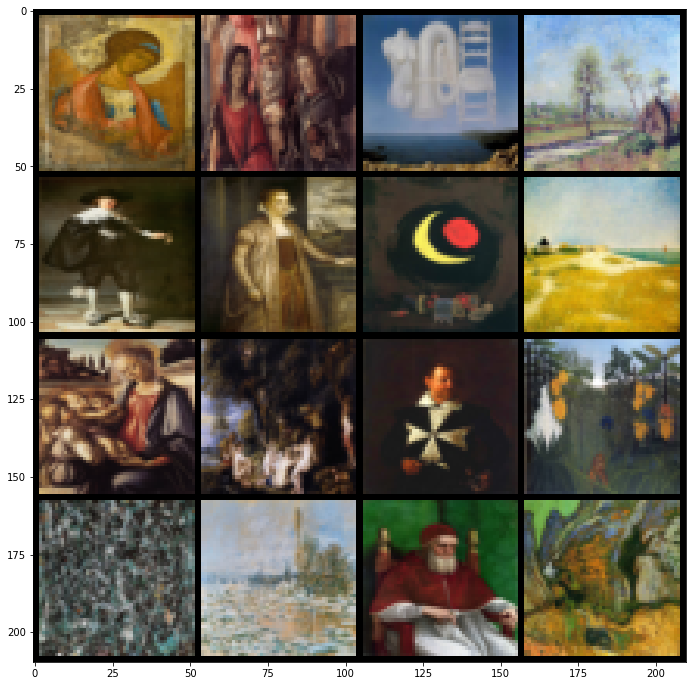

In [128]:
imgs = tv.utils.make_grid(img,nrow=4,normalize=True)
plt.figure(figsize=(12,12))
plt.imshow(imgs.permute(1,2,0))

In [144]:
e = [1,2,3,4]
s = []

In [145]:
s.append((e,1))

In [149]:
s[0][1]

1

In [169]:
def data(x):
    X=torch.empty(8446,3,50,50)
    for idx,i in enumerate(x):
        z = Image.open(i)
        if z.getbands()[0]=='L':
            z = z.convert('RGB')
        X[idx]=tfms(z)
    return X

In [170]:
X = data(x)

In [171]:
len(X)

8446

In [9]:
def data(x):
    a=[]
    for i in x:
        z = Image.open(i)
        if z.getbands()[0]=='L':
            z = z.convert('RGB')
        a.append(tfms(z))
    return torch.cat(a)

In [15]:
X1 = data(x)

In [27]:
X1= X1.view(-1,3,50,50)